# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


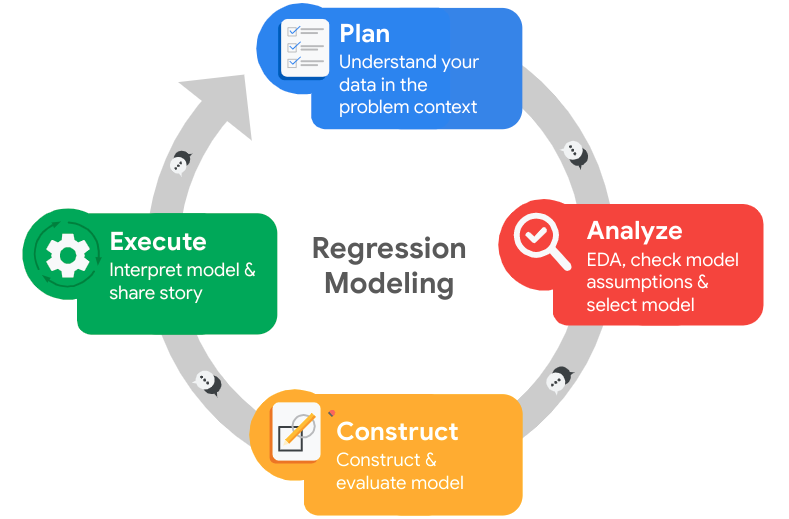

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Stakeholders**: Senior Leadership team at Salifort Motors

**Goal:** identify the factors that are affecting employees of the company for high turnover rate. The solution brings high retention rates and saves cost on the larger need.

**Initial Observations:** Probably I can take "left" variable as the output variable, and the rest as predictors. The predictors seem to have a great level of impact of the turnover rate.

**Resources:** Project Strategy Document so far, the document will be shared in links afterwards.

**Ethical Considerations:** No ethical considerations (Ownership, Transparency, Privacy, Intention, and Outcome) is violated, no personal data is used in the dataset, even for this fictional scenario, employees have been aware of the intention and outcome of their given data. 

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages
### YOUR CODE HERE ### 

# Imports for data manipulation
import numpy as np
import pandas as pd

# Imports for Preprocessing, Modelling and Evaluation
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,\
confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, classification_report
from scipy.stats import chi2_contingency 
from sklearn.tree import plot_tree

# Imports for Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor, plot_importance


# Imports for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display all of the columns of the dataset
pd.set_option('display.max_columns', None)

# For saving models
%pylab inline
import pickle as pkl

Populating the interactive namespace from numpy and matplotlib


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns = {'Work_accident': 'work_accident',
                           'Department': 'department',
                           'time_spend_company': 'tenure',
                           'average_montly_hours': 'average_monthly_hours'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

### Check missing values

Check for any missing values in the data.

In [54]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
duplicate_values = df0.duplicated()
df0[duplicate_values].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [7]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display if the new dataframe has duplicates or not
### YOUR CODE HERE ###
df1.duplicated().sum()

0

In [13]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
# Rename columns as needed
### YOUR CODE HERE ###
df1 = df1.rename(columns = {'Work_accident': 'work_accident',
                           'Department': 'department',
                           'time_spend_company': 'tenure',
                           'average_montly_hours': 'average_monthly_hours'})

# Display all column names after the update
### YOUR CODE HERE ###
df1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

### Check outliers

Check for outliers in the data.

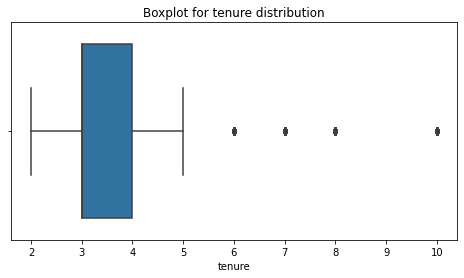

In [15]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(8,4))
plt.title('Boxplot for tenure distribution')
sns.boxplot(data = df1,
           x = 'tenure')
plt.show()


Text(0.5, 1.0, 'average_monthly_hours')

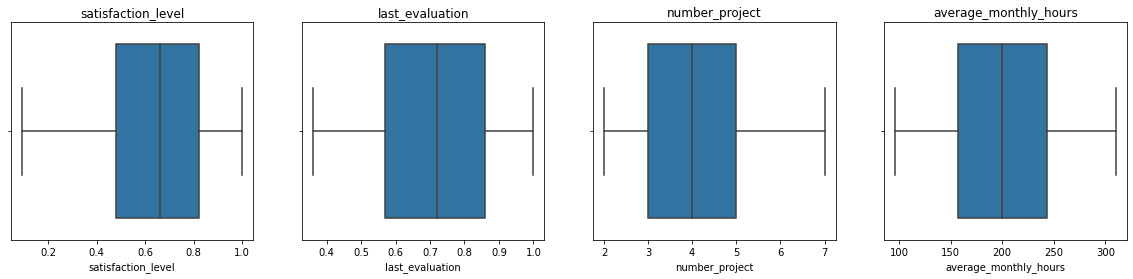

In [16]:
fig, axes = plt.subplots(1, 4, figsize = (20, 4))
sns.boxplot(data = df1, x = 'satisfaction_level', ax = axes[0])
axes[0].set_title("satisfaction_level")

sns.boxplot(data = df1, x = 'last_evaluation', ax = axes[1])
axes[1].set_title("last_evaluation")

sns.boxplot(data = df1, x = 'number_project', ax = axes[2])
axes[2].set_title("number_project")

sns.boxplot(data = df1, x = 'average_monthly_hours')
axes[3].set_title("average_monthly_hours")

In [17]:
df1[df1['tenure'] > 5]['tenure'].count()

824

In [18]:
df1[df1['tenure'] > 5]['left'].value_counts()

0    715
1    109
Name: left, dtype: int64

#### Outliers detection for 'tenure'
We have learned the following 3 techniques in this specialization
1. Using Z-score
2. Using Standard Deviation and
3. Using IQR & Quantile range

We will apply all of the three and find the best one to detect outliers.

In [19]:
# Method 1: Using z-score
# Determine the number of rows containing outliers
# Using z-score
df_temp = df1.copy()
df_temp['z_score'] = stats.zscore(df1['tenure'])
df_temp.head()

# Get the numbers of rows containing outliers
outliers1 = df_temp[(df_temp['z_score'] > 3) | (df_temp['z_score'] < -3)]
outliers1['tenure'].describe()


count    188.000000
mean       9.138298
std        0.993035
min        8.000000
25%        8.000000
50%       10.000000
75%       10.000000
max       10.000000
Name: tenure, dtype: float64

In [20]:
# Method 2: Using Standard deviation
# Determine the number of rows containing outliers
# Using 3 std of the mean
mean_tenure = df1['tenure'].mean()
std_tenure = df1['tenure'].std()

lower_limit = mean_tenure - (3*std_tenure)
upper_limit = mean_tenure + (3*std_tenure)

outliers2 = df1[(df1['tenure'] < lower_limit)  | (df1['tenure'] > upper_limit)]
outliers2['tenure'].describe()

count    188.000000
mean       9.138298
std        0.993035
min        8.000000
25%        8.000000
50%       10.000000
75%       10.000000
max       10.000000
Name: tenure, dtype: float64

In [9]:
# Method 3: Using Interquartile range and quantiles

def outlier_imputer(df, column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.
    
    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in formula:
            Q3 + (x*IQR"). It is used to determine maximum
            threshold, beyond which a point is considered an
            outlier.
            
    The IQR is computed for each column in column_list and values
    exceeding the upper threshold for each column are imputed with
    the upper threshold value.
    '''
    for col in column_list:
        #Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0
        
        #calculate upper limit
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        
        #count how many outliers are there
        influential_values = df.loc[df[col] > upper_threshold, col]
        
        #Reassign values > than upper threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        
        #count the len
        influential_values_len = len(influential_values)
        
        print(f'influential values or Outliers: {influential_values_len}')
        print(df[col].describe())
        print()

In [10]:
outlier_imputer(df1,['tenure'], 1.5)

influential values or Outliers: 824
count    11991.000000
mean         3.273455
std          1.057809
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.500000
Name: tenure, dtype: float64



**Outliers detection:** So out of the 3 above process, the outlier imputer function detected more outliers, so we chose to apply this one in the dataset and handle the outliers.

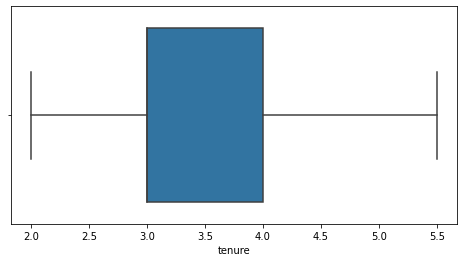

In [23]:
# Let's verify if the outliers are handled properly

plt.figure(figsize=(8,4))
sns.boxplot(data=df1,
           x='tenure')


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



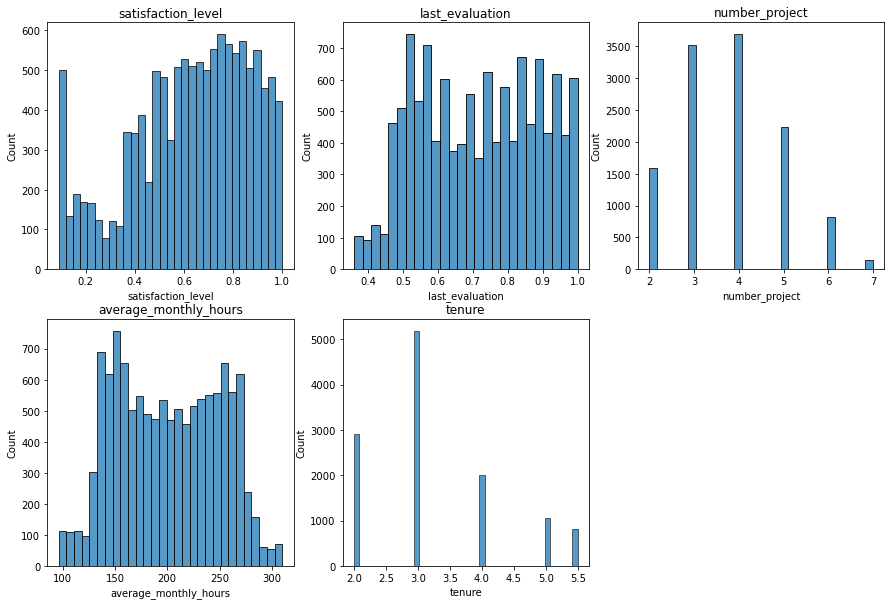

In [25]:
# Show distribution of all numerical variables again, now with histplot

fig, axes = plt.subplots(2, 3, figsize = (15, 10))
sns.histplot(data = df1, x = 'satisfaction_level', ax = axes[0,0])
axes[0,0].set_title("satisfaction_level")

sns.histplot(data = df1, x = 'last_evaluation', ax = axes[0,1])
axes[0,1].set_title("last_evaluation")

sns.histplot(data = df1, x = 'number_project', ax = axes[0,2])
axes[0,2].set_title("number_project")

sns.histplot(data = df1, x = 'average_monthly_hours', ax = axes[1, 0])
axes[1,0].set_title("average_monthly_hours")

sns.histplot(data = df1, x = 'tenure', ax = axes[1,1])
axes[1,1].set_title("tenure")

# Hide the empty subplot in the last position
axes[1, 2].axis('off')
plt.show()

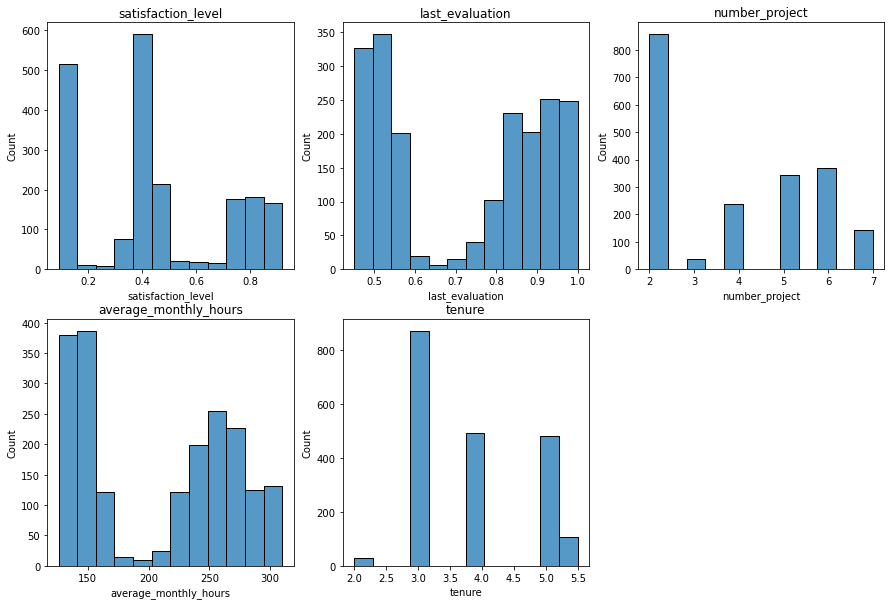

In [26]:
# Check distributions for employees who left
df2 = df1[df1['left'] == 1]

# Create some histograms
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
sns.histplot(data = df2, x = 'satisfaction_level', ax = axes[0,0])
axes[0,0].set_title("satisfaction_level")

sns.histplot(data = df2, x = 'last_evaluation', ax = axes[0,1])
axes[0,1].set_title("last_evaluation")

sns.histplot(data = df2, x = 'number_project', ax = axes[0,2])
axes[0,2].set_title("number_project")

sns.histplot(data = df2, x = 'average_monthly_hours', ax = axes[1, 0])
axes[1,0].set_title("average_monthly_hours")

sns.histplot(data = df2, x = 'tenure', ax = axes[1,1])
axes[1,1].set_title("tenure")

# Hide the empty subplot in the last position
axes[1, 2].axis('off')
plt.show()

💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**My Answers:**

1. There are postive and negative relationships between some of the variables. 
2. The distributions in the data vary across different variables. For example, The distribution of satsfaction level appears to be slightly skewed to the right, with a majority of employees reporting to high satisfaction, although there is no particular skew for only those who left the company. On the other hand, the distribution of average monthly hours worked seems to be more symmetric, centered around a typical range of hours. Additionally, the distribution of tenure shows a peak around 3 to 5 years, suggesting that a significant portion of employees have been with the company for a moderate duration. Overall, these distributions provide insights into the characteristics and patterns within the dataset.
3. Beside the outliers handling, the only step I took is to make the categorical variables into numerical data, as for the data modeling purpose in the next step.
4. EDA is needed to understand which variables are present in the data, consider the distribution of features, including mean, midea, mode etc., plot the relationship between variables, and identify issues with the data.
5. I had to revise which visulation is needed to explain relationship in proper way, such as for two categorical variables, scatterplot or lineplot - which one makes more sense.
6. No ethical consideration was needed to consider at this stage

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [28]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


Around 17% of the employees left the company. Let's explore if other variables has any relation to it.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

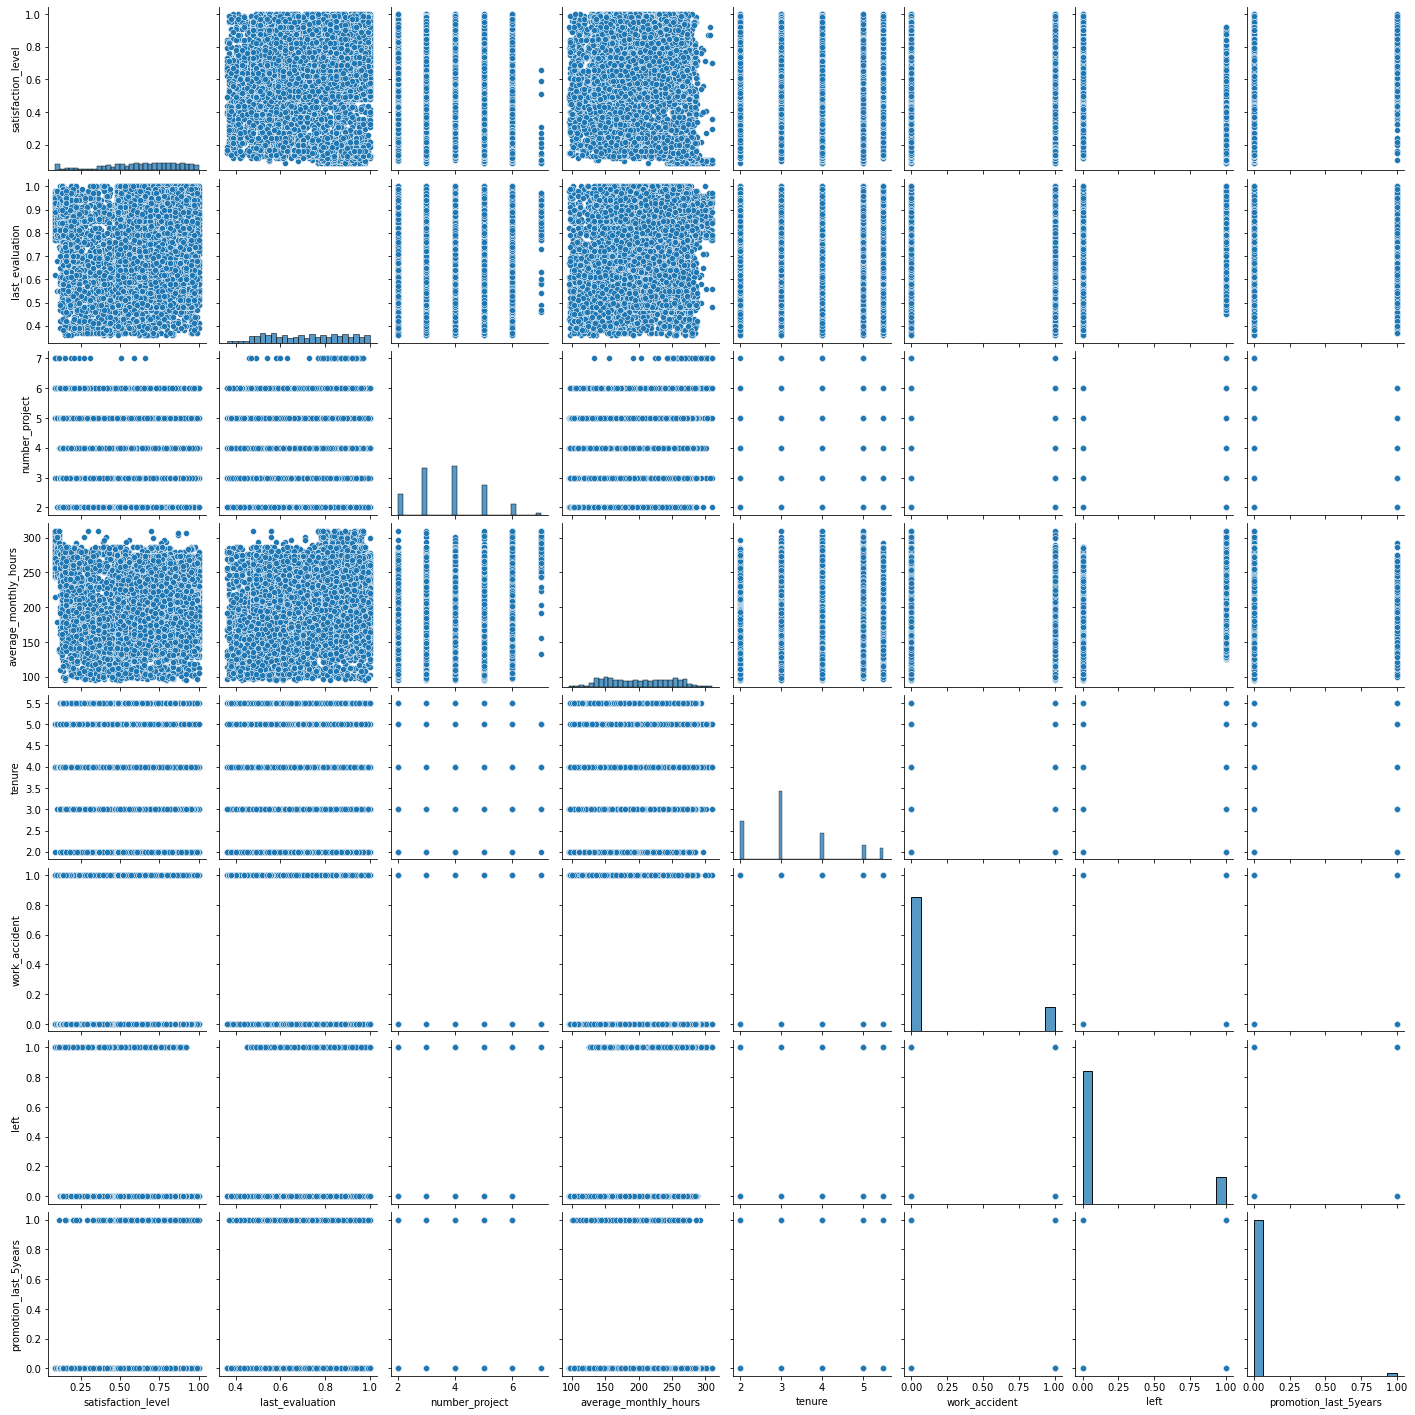

In [29]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.pairplot(df1)

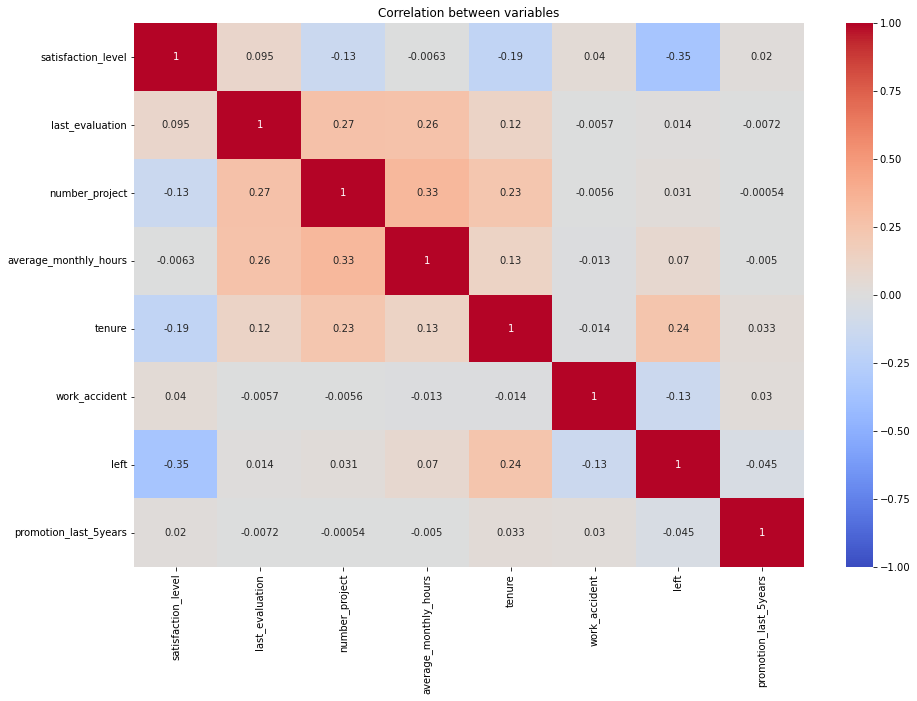

In [30]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(df1.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation between variables');

The heatmap provides interesting insights correlation among some variables. last evaluation, average monthly hours and number of projects are positively correlated with each other. And employee leaving company or not is negatively correlated with satisfaction level. Satisfaction level is also negatively correlated with numbers of project. Let's verfify more these relations with other visualizations.

#### First relationship : satisfaction level vs number_project vs left
By the negative values, it means that when satisfaction level of employees decreases, the numbers of assigned projects may increase i.e. employees with lower satisfaction levels may be assigned to more proejects compared to those with higher satisfaction level. In addition, employees with lower satisfaction level are more likely to leave the company compared to those with higher satisfaction level.

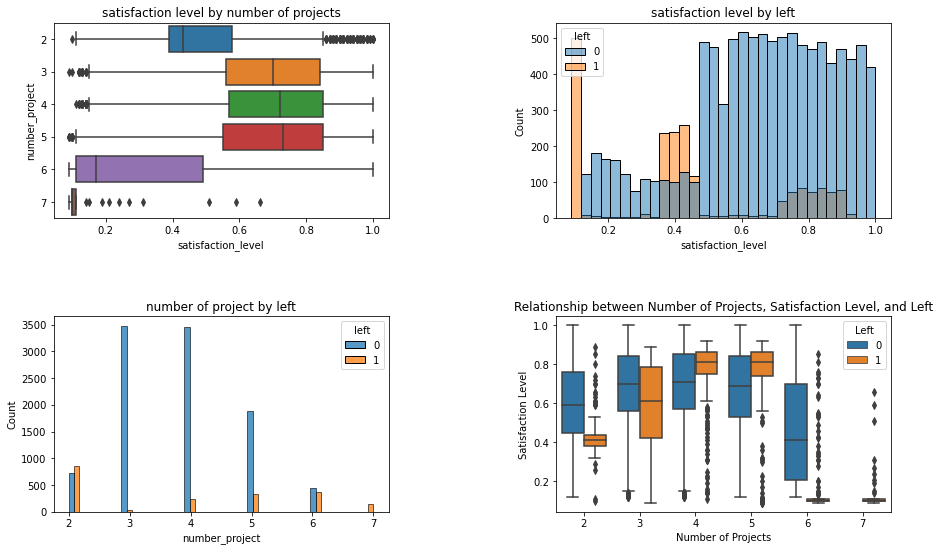

In [31]:
# let's visualize the relationship between satisfaction level, number_project and left
fig, axes = plt.subplots(2, 2, figsize = (15, 9))

# satisfaction by number of projects
sns.boxplot(data = df1, x = 'satisfaction_level',y = 'number_project', orient = 'h', ax = axes[0,0])

# satisfaction level by left
sns.histplot(data = df1, x = 'satisfaction_level', hue = 'left', ax = axes[0,1])

# number of projects vs left
sns.histplot(data=df1, x='number_project', hue='left', multiple = 'dodge', ax = axes[1,0])

# all together
sns.boxplot(data = df1, x='number_project', y='satisfaction_level', hue='left', ax = axes[1,1])
plt.xlabel('Number of Projects')
plt.ylabel('Satisfaction Level')
plt.legend(title='Left', loc='upper right')

axes[0,0].set_title("satisfaction level by number of projects")
axes[0,1].set_title('satisfaction level by left')
axes[1,0].set_title('number of project by left')
axes[1,1].set_title('Relationship between Number of Projects, Satisfaction Level, and Left')

# Adjust spacing between subplots to prevent overlap
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show();

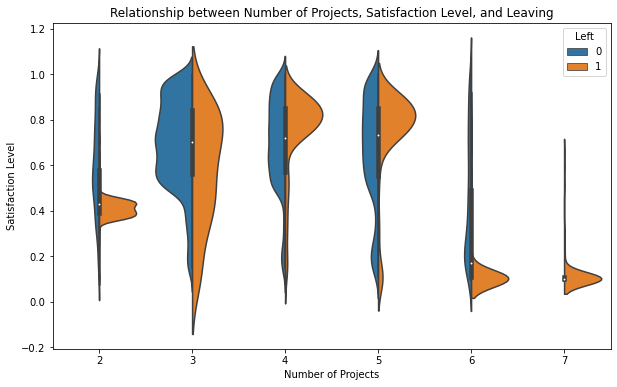

In [32]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='number_project', y='satisfaction_level', hue='left', data=df1, split=True)
plt.title('Relationship between Number of Projects, Satisfaction Level, and Leaving')
plt.xlabel('Number of Projects')
plt.ylabel('Satisfaction Level')
plt.legend(title='Left', loc='upper right')
plt.show()

#### My takeaways from these graphs:
- I noticed a negative correlation between satisfaction level and number of projects, implying that as employees receive more projects, generally 6 or more projects, the satisfaction level then decreases. 
- I also observed that employees with lower satisfaction levels are significantly more likely to leave the company, indicating a strong connection between satisfaction and retention.
- Particularly noteworthy is my observation that employees assigned with either 2 projects or 6 or more projects are more prone to leaving compared to those with 3, 4, or 5 projects, suggesting potential dissatisfaction thresholds.


#### 2nd relationship: last_evaluation, average_monthly_hours and number_projects by left

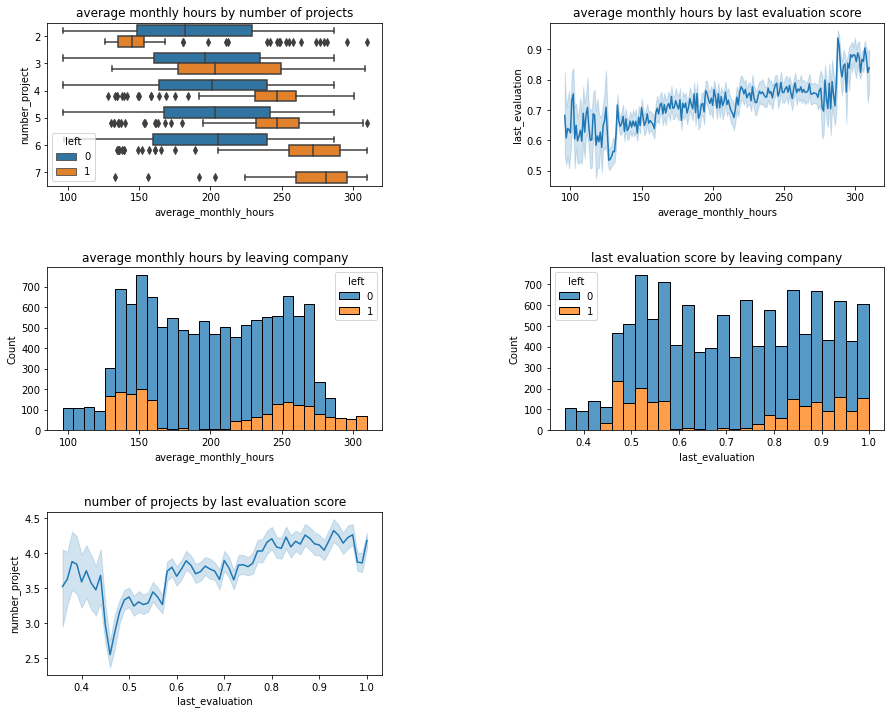

In [33]:
# Create a histogram to show relationship between average monthly hours, number of projects and last evaluation score
fig, axes = plt.subplots(3,2, figsize = (15,12))
sns.boxplot(data = df1,
            x = 'average_monthly_hours',
            y = 'number_project',
            hue = 'left',
            orient = 'h',
            ax = axes[0,0])

sns.lineplot(data=df1,
            x = 'average_monthly_hours',
            y = 'last_evaluation',
            ax = axes[0,1])

sns.histplot(data = df1,
            x = 'average_monthly_hours',
            hue = 'left',
            multiple = 'stack',
            ax = axes[1,0])

sns.histplot(data=df1,
            x = 'last_evaluation',
            hue = 'left',
             multiple = 'stack',
            ax = axes[1,1])
sns.lineplot(data=df1,
            y = 'number_project',
            x = 'last_evaluation',
            ax = axes[2,0])

axes[2,1].axis('off')

axes[0,0].set_title('average monthly hours by number of projects')
axes[0,1].set_title('average monthly hours by last evaluation score')
axes[1,0].set_title('average monthly hours by leaving company')
axes[1,1].set_title('last evaluation score by leaving company')
axes[2,0].set_title('number of projects by last evaluation score')


# Adjust spacing between subplots to prevent overlap
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show();

#### Observations
- I noticed that employees who left the company typically worked on fewer projects with lower monthly working hours, often around 150 hours per month, and had at most 2 projects. Conversely, employees working more than 250 hours with 6 or more projects showed a higher tendency to leave.
- In the line graphs depicting last_evaluation by number_projects and last_evaluation by average_monthly_hours, I observed that as average monthly hours or number of projects increased, last evaluation scores also tended to increase. However, it's noteworthy that employees with higher evaluation scores were more likely to leave the company, despite their higher performance ratings.


**3rd Relationship: Tenure with promotion_last_5years by left**

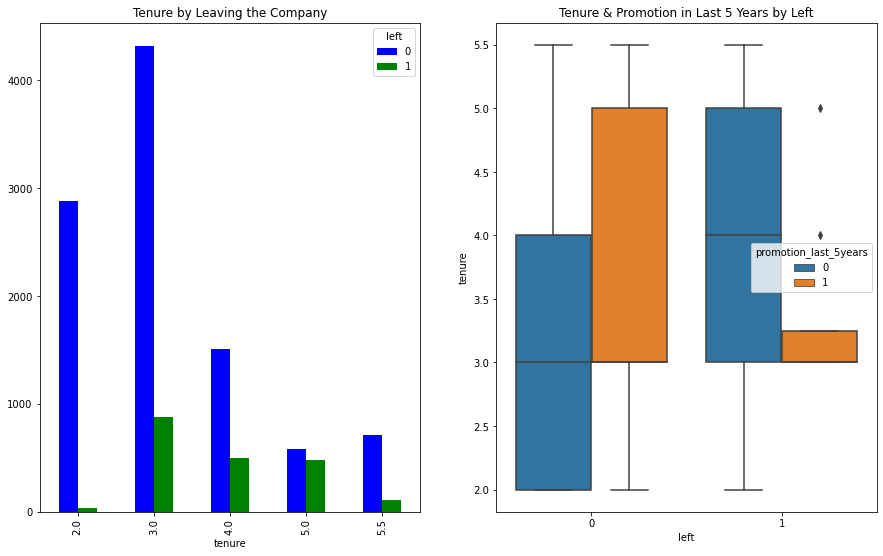

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 9))

pd.crosstab(df1['tenure'], df1['left']).plot(kind='bar', color=['b', 'g'], ax=axes[0])

sns.boxplot(data=df1,
            x='left',
            y='tenure',
            hue='promotion_last_5years',
            ax=axes[1])

axes[0].set_title('Tenure by Leaving the Company')
axes[1].set_title('Tenure & Promotion in Last 5 Years by Left')

plt.show()

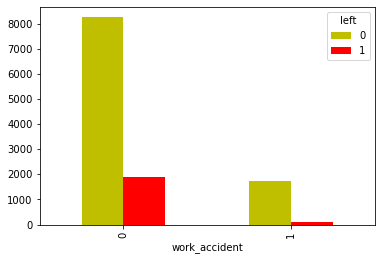

In [35]:
pd.crosstab(df1['work_accident'], df1['left']).plot(kind='bar', color='yr')

In [36]:
df1[(df1['tenure'] < 3) & (df1['left'] == 1)]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
50,0.13,0.78,6,152,2.0,0,1,0,support,low
116,0.86,0.68,5,263,2.0,0,1,0,technical,medium
175,0.54,0.74,4,164,2.0,0,1,0,sales,low
376,0.56,0.71,4,296,2.0,0,1,0,IT,medium
378,0.31,0.56,4,238,2.0,0,1,0,accounting,medium
485,0.32,0.95,5,172,2.0,0,1,0,sales,low
576,0.48,0.78,2,198,2.0,0,1,0,technical,medium
620,0.80,0.75,3,268,2.0,0,1,0,sales,medium
631,0.34,0.67,4,141,2.0,0,1,0,sales,low
710,0.64,0.90,6,252,2.0,0,1,0,sales,low


Observation: For the boxplot comparing "left" vs. "tenure," the middle 50% or the central half of employees who left the company (or fired) had a tenure between 3 and 5 years, with the majority not receiving a promotion in the last 5 years.

### Insights

**The major problem HR faces is the lack of effective workload management and career advancement opportunities leading to high turnover rates among employees.**

1. **Satisfaction Level and Number of Projects**: 
   - Employees with lower satisfaction levels tend to be assigned to more projects.
   - Lower satisfaction levels are associated with a higher likelihood of leaving the company.
   - Employees assigned to 2 projects or 6+ projects are more likely to leave compared to those with 3, 4, or 5 projects.

2. **Last Evaluation, Average Monthly Hours, and Number of Projects**:
   - Higher numbers of assigned projects correlate with higher average monthly working hours.
   - Both extremely high (250+ monthly) and very low working hours (due to less assigned projects) are associated with a higher turnover rate.

3. **Left vs. Tenure**:
   - The middle 50% of employees who left the company had a tenure between 3 and 5 years.
   - Most of these employees did not receive a promotion in the last 5 years.
   
4. **Project Assignment and Satisfaction Level**:
   - Employees assigned to 6 or more projects tend to have lower satisfaction levels.
   - Lower or higher numbers of assigned projects lead to lower satisfaction scores, which may contribute to higher turnover rates.

From this stage, before creating models, we can insight about - 
**Implications for Employee Retention**:
   - Managing project assignments and workload distribution may help improve employee satisfaction and reduce turnover.
   - Providing opportunities for advancement, such as promotions, can positively impact employee retention, especially for those with longer tenures.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

# Model 1: Logistic Regression


In [13]:
df2 = df1.copy()
# We need to do LableEncoder for the categorical variable that has inherent order or ranking
df2['salary'] = LabelEncoder().fit_transform(df2['salary'])
# Change the other categorical variables into numeric by one hot encoder
encoder = pd.get_dummies(df2['department'], prefix='department')
df2 = pd.concat([df2, encoder], axis=1)
df2.head()



,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3.0,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,5.5,0,1,0,sales,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4.0,0,1,0,sales,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5.0,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3.0,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0


### Defining X and Y variables

In [38]:
# define y, the outcome variable
y = df2['left']

# define X, the predictors
X = df2.drop(columns = ['left','department'], axis = 1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3.0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,5.5,0,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4.0,0,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5.0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3.0,0,0,1,0,0,0,0,0,0,0,1,0,0


### Assumption check for LogisticRegression: Independence & Multicollinearity
Method 1: Pearson Correlation Coefficient matrix: for continuous variables

Method 2: Chi-square Test: for categorical variables

In [39]:
# Method 1: Corrleation matrix for continuous variables
correlation_matrix = X[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', 'promotion_last_5years']].corr()
correlation_matrix

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.193786,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.118604,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.234585,-0.000544
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.128970,-0.004964
tenure,-0.193786,0.118604,0.234585,0.128970,1.000000,0.033300
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.033300,1.000000


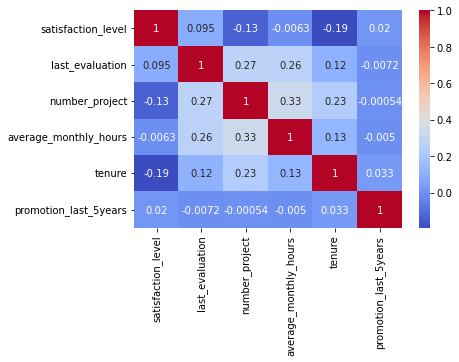

In [40]:
# let's visualize the matrix
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot=True)

**Observation:** If there are predictor variables that have Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in our model. But in this case, none of them has that strong multicollinearity. 
0.7 is an arbitrary threshold, some use 0.6, 0.8 etc.

In [41]:
# Method 2: Chi-square test for categorical values

# Loop through each pair of categorical values
for col1 in X.select_dtypes(include='uint8').columns:
    for col2 in X.select_dtypes(include='uint8').columns:
        if col1 != col2:
            # Create contingency table
            contingency_table = pd.crosstab(X[col1], X[col2])
            # Perfom chi-square test
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            
            print(f"Chi-square test for {col1} and {col2}: p-value = ", p_value)

Chi-square test for department_IT and department_RandD: p-value =  1.1705816821674463e-15
Chi-square test for department_IT and department_accounting: p-value =  4.6146523754736706e-14
Chi-square test for department_IT and department_hr: p-value =  1.2539776654695623e-13
Chi-square test for department_IT and department_management: p-value =  4.307243087844815e-10
Chi-square test for department_IT and department_marketing: p-value =  3.382717933219461e-15
Chi-square test for department_IT and department_product_mng: p-value =  1.7544648184575435e-15
Chi-square test for department_IT and department_sales: p-value =  3.4953233083066e-87
Chi-square test for department_IT and department_support: p-value =  5.356589171547799e-43
Chi-square test for department_IT and department_technical: p-value =  7.609366662440364e-55
Chi-square test for department_RandD and department_IT: p-value =  1.1705816821674463e-15
Chi-square test for department_RandD and department_accounting: p-value =  3.9824971

### As expected, p-value is very small. Still the previous step is unnecessary as we hot encoded the department variable, so each of the encoded variable has perfect multicollinearity with each other. It is just a process to show if we have multiple categorical variables in X, then we can do chi-square test to check the multicollinearity.

In [42]:
# Third assumption check: no extreme outliers
# Just we can apply the imputer function we defined before to X variables
outlier_imputer(X,['satisfaction_level', 'last_evaluation','average_monthly_hours'], 1.5)

influential values or Outliers: 0
count    11991.000000
mean         0.629658
std          0.241070
min          0.090000
25%          0.480000
50%          0.660000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

influential values or Outliers: 0
count    11991.000000
mean         0.716683
std          0.168343
min          0.360000
25%          0.570000
50%          0.720000
75%          0.860000
max          1.000000
Name: last_evaluation, dtype: float64

influential values or Outliers: 0
count    11991.000000
mean       200.473522
std         48.727813
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
Name: average_monthly_hours, dtype: float64



In [43]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [45]:
# Build the model, and fit the training sets
logistic_regression = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [46]:
# print coefficient of each variable
# Coefficients represent the change in the log odds of the target variable for every one unit increase in X.

print(logistic_regression.coef_)
pd.Series(logistic_regression.coef_[0], index = X.columns)

[[-3.70600918e+00  6.55981206e-01 -3.15885193e-01  3.49752604e-03
   5.62681351e-01 -1.27707235e+00 -1.24877487e+00  5.94971136e-02
  -1.45296256e-01 -5.53895497e-01 -1.62065887e-01  9.87729988e-02
  -4.60365031e-01  6.34550347e-02 -2.09896710e-02 -3.55705786e-03
   3.64362634e-02  1.65129629e-02]]


satisfaction_level       -3.706009
last_evaluation           0.655981
number_project           -0.315885
average_monthly_hours     0.003498
tenure                    0.562681
work_accident            -1.277072
promotion_last_5years    -1.248775
salary                    0.059497
department_IT            -0.145296
department_RandD         -0.553895
department_accounting    -0.162066
department_hr             0.098773
department_management    -0.460365
department_marketing      0.063455
department_product_mng   -0.020990
department_sales         -0.003557
department_support        0.036436
department_technical      0.016513
dtype: float64

In [47]:
# intercept of the model
logistic_regression.intercept_

array([-1.38009668])

#### Check final assumption: Verify the linear relationship between X and the estimated log odds or logits by a regplot

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. 

In [48]:
training_probabilities = logistic_regression.predict_proba(X_train)
training_probabilities

array([[0.98421489, 0.01578511],
       [0.70644094, 0.29355906],
       [0.73817971, 0.26182029],
       ...,
       [0.96219658, 0.03780342],
       [0.73941923, 0.26058077],
       [0.868404  , 0.131596  ]])

In [49]:
# Copy X_train dataframe to logit data
logit_data = X_train.copy()

# Create a new logit column in the logit data
logit_data['logit'] = [np.log(prob[1]/ prob[0]) for prob in training_probabilities]
logit_data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,logit
6957,0.96,0.37,3,111,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,-4.132777
9240,0.19,1.00,4,188,4.0,1,0,2,0,0,0,0,0,1,0,0,0,0,-0.878161
618,0.45,0.57,2,148,3.0,0,0,0,0,0,0,0,0,1,0,0,0,0,-1.036529
9296,0.72,0.79,4,154,3.0,0,0,2,1,0,0,0,0,0,0,0,0,0,-2.593378
6030,0.54,0.82,2,279,3.0,1,0,1,0,0,0,0,0,1,0,0,0,0,-1.965474


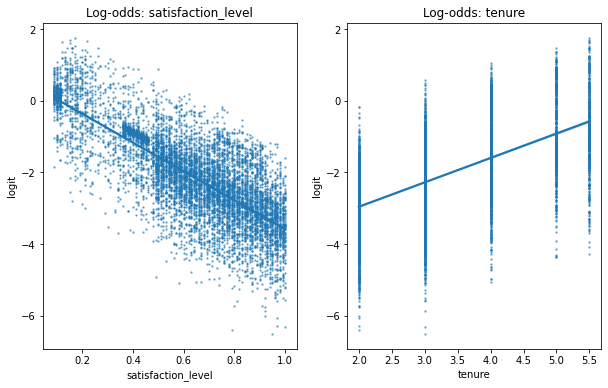

In [50]:
# Plot a regplot for just one variable

fig, axes = plt.subplots(1, 2, figsize=(10,6))

sns.regplot(data = logit_data,
           x = 'satisfaction_level',
           y = 'logit',
           scatter_kws = {'s':2, 'alpha': 0.5},
           ax = axes[0])
axes[0].set_title("Log-odds: satisfaction_level")

sns.regplot(data=logit_data,
           x = 'tenure',
           y = 'logit',
           scatter_kws = {'s': 2, 'alpha': 0.5},
           ax = axes[1])
axes[1].set_title("Log-odds: tenure")

plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






In [51]:
# Use the trained model on the test data for predictions
y_pred = logistic_regression.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

**Evaluating the model performance**

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



In [52]:
# Print precision, recall, accuracy and f1 scores
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Accuracy Score:  0.8232351306281267
Precision Score:  0.4331983805668016
Recall Score:  0.17744610281923714
F1 Score:  0.25176470588235295


In [53]:
# Classification Report
print("classification report: ")
print(classification_report(y_test, y_pred))

classification report: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2995
           1       0.43      0.18      0.25       603

    accuracy                           0.82      3598
   macro avg       0.64      0.57      0.58      3598
weighted avg       0.78      0.82      0.79      3598



Insight from classification report: Precision score of employees who did not leave the company is 85%, and left the company is 43%. Recall score 95% and f-score is 90%. The model has good scores for employees who did not leave company. But, as for our business problem, the scores are pretty insignificant to predict who leave the company.

Confustion Matrix


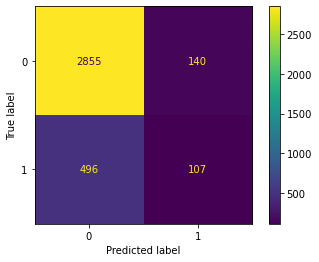

In [54]:
# Confustion Matrix
print("Confustion Matrix")
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                 display_labels = clf.classes_)
cm_disp.plot(values_format='')


**Observation from the confustion matrix** 

True Negative (0-0, TN): The upper-left quadrant, the model correctly predicted a positive outcome, and it was indeed positive. The model correctly identified 2855 employees who did not leave the company.

True Positive (1-1, TP): Lower-right quadrant, the model correctly predicted a negative outcome, and it was indeed negative. Meaning, 107 left the company indeed, and the model predicted that correctly.

False Positive (0-1, FP): The upper-right box, model predicted 140 employees did not leave the company, but they actually left (1).

False Negative(1-0, FN): The lower-left quadrant, model predicted 496 people left the company (1), but actually they did not (0). 


**A perfect model would tell all true negatives and true positives, no false negatives or positives.**

In [55]:
# Generate a bar graph of model's coefficients for a visual representation of the importance of the model's features
feature_importance = list(zip(X_train.columns, clf.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x:[1], reverse = True)
feature_importance

[('satisfaction_level', -3.706009178343833),
 ('last_evaluation', 0.6559812055516547),
 ('number_project', -0.31588519304158563),
 ('average_monthly_hours', 0.003497526038174016),
 ('tenure', 0.5626813509208414),
 ('work_accident', -1.2770723492667555),
 ('promotion_last_5years', -1.2487748671878796),
 ('salary', 0.05949711364986801),
 ('department_IT', -0.14529625642538888),
 ('department_RandD', -0.5538954973920013),
 ('department_accounting', -0.16206588710217634),
 ('department_hr', 0.09877299884485272),
 ('department_management', -0.4603650309168715),
 ('department_marketing', 0.06345503465505925),
 ('department_product_mng', -0.020989670965353268),
 ('department_sales', -0.00355705786150272),
 ('department_support', 0.036436263390011776),
 ('department_technical', 0.016512962874918005)]

Text(0.5, 1.0, 'Feature importance')

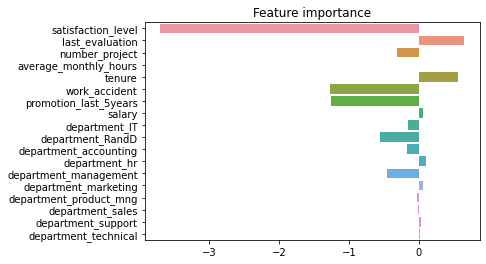

In [56]:
# Plot the feature importances
sns.barplot(x = [x[1] for x in feature_importance],
           y = [x[0] for x in feature_importance], 
           orient = 'h')
plt.title("Feature importance")

Based on the above plots and feature importance values, the satisfaction level has the largest negative coefficient magnitude, indicating that decreases in satisfaction level have the most significant impact on the likelihood of leaving the company. 

The next largest negative coefficient magnitudes are shown by work_accident & promotion in last 5 years, suggesting that the absence of work_accident might be also important in predicting employee retention. In addition, employees who are not promoted in the last 5 years, are more likely to leave the company.

On the postive side, the more the last evaluation score, the more likely employees would leave the company.


### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



# Model 2: Implement a decision tree

In [57]:
# Define the outcome variable
y = df2['left']

# Define X variables
X = X.copy() # we simply copy the previous predictors to avoid encoding tasks again
#X = X.drop('department', axis=1)
#X.info()

In [58]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.25,
                                                   stratify = y,
                                                   random_state=42)

In [76]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model into training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Plot the Decision Tree

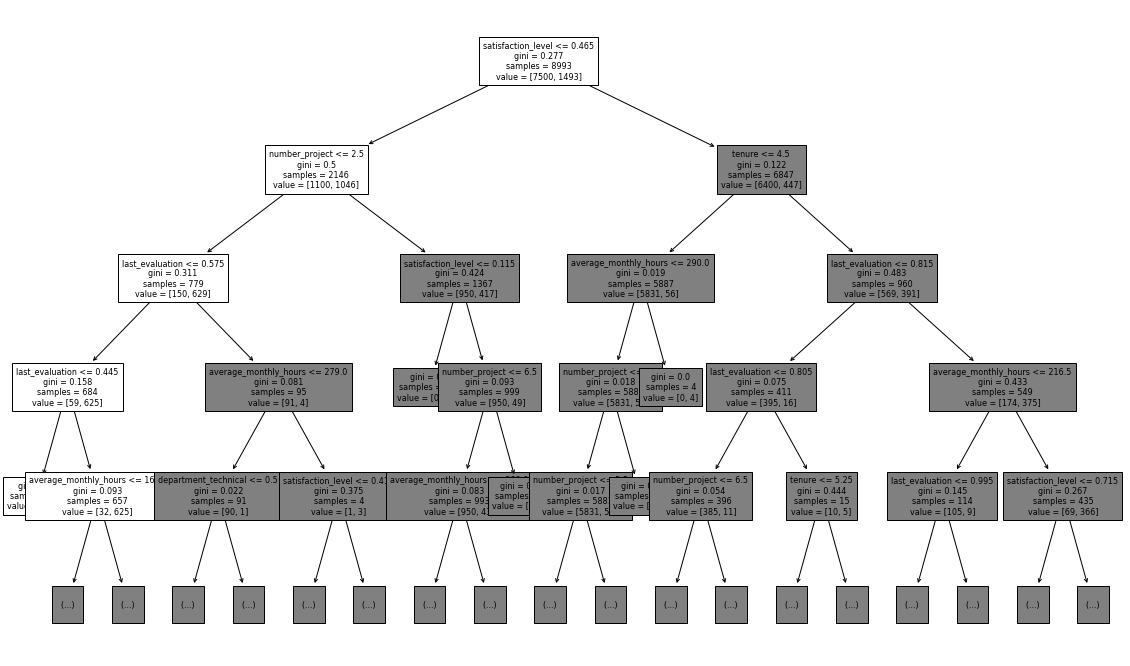

In [64]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth = 4, fontsize = 8, feature_names = X.columns);

In [73]:
decision_tree_pred = decision_tree.predict(X_test)

In [66]:
# Evaluation Scores

print("Decision Tree")
print("Accuracy: ", accuracy_score(y_test, decision_tree_pred))
print("Precision: ", precision_score(y_test, decision_tree_pred))
print("Recall: ", recall_score(y_test, decision_tree_pred))
print("F1 Score: ", f1_score(y_test, decision_tree_pred))

Decision Tree
Accuracy:  0.9679786524349566
Precision:  0.888030888030888
Recall:  0.9236947791164659
F1 Score:  0.9055118110236221


In [74]:
print(classification_report(y_test, decision_tree_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2500
           1       0.89      0.92      0.91       498

    accuracy                           0.97      2998
   macro avg       0.94      0.95      0.94      2998
weighted avg       0.97      0.97      0.97      2998



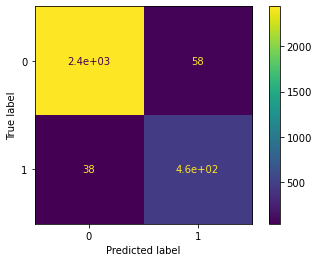

In [81]:
from sklearn.metrics import confusion_matrix as cm

# Calculate the confusion matrix
conf_matrix = cm(y_test, decision_tree_pred, labels=decision_tree.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=decision_tree.classes_)
disp.plot()


In the confusion matrix, there are a high proportion of true positives and true negatives (where the matrix accurately predicted that the employees will not leave or leave the company, respectively).

The matrix also had a relatively low number of false positives and false negatives (where the matrix innacurately predicted that employees will leave or not, respectively.)

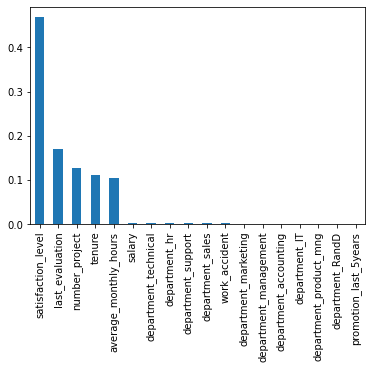

In [57]:
# Calculate feature_importance
feature_importances = pd.Series(decision_tree.feature_importances_, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
feature_importances.plot.bar(ax=ax);

# Model 2.1: Tuned Decision Tree

**Hyperparameter tuning** for a decision tree involves finding the optimal values for parameters that are set before the learning process begins. These parameters control the learning process and the structure of the decision tree. The goal of hyperparameter tuning is to improve the performance of the decision tree model by selecting the best combination of hyperparameters. 

**The list of hyperparameters**
1. **max_depth**: This hyperparameter controls the maximum depth of the decision tree. A deeper tree can capture more complex relationships in the data but may lead to overfitting. 
2. **min_samples_leaf**:This parameter specifies the minimum number of samples required to be at a leaf node. It controls the minimum size of the leaf nodes and can also help prevent overfitting.
3. **min_samples_split**: this parameter specifies the minimum number of samples required to split a node. Increasing this value can help prevent overfitting by requiring more samples for a node to split.

The feature importance graph seems to confirm that `'satisfaction_level'`, `'last_evaluation'`,  `'number_project'`, `'tenure'`, and `'average_monthly_hours'` are the most important features for this model. 

In [45]:
# Instantiate the model
dt = DecisionTreeClassifier(random_state=0)

# Assign the hyperparameters
tree_para = {'max_depth': [1, 2, 3, 4, 6, 7, 8, 15, 18, 20, 30, 40, 50],
            'min_samples_leaf': [2, 4, 5, 6, 8],
            'min_samples_split': [2, 4, 6]}

# Define the Scoring
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [14]:
# Define y variable
y = df2['left']

# define X variable, delete satisfaction_level
X3 = df2.copy()
X3 = X3.drop(columns = ['left','department'])
X = X3
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3.0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,5.5,0,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4.0,0,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5.0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3.0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=42)

In [47]:
# Instantiate the GridSearch based on Tuning
tuned_dt = GridSearchCV(dt, tree_para, scoring=scoring, cv=4, refit='roc_auc')

In [48]:
%%time
tuned_dt.fit(X_train, y_train)

CPU times: user 18.9 s, sys: 24.9 ms, total: 19 s
Wall time: 19 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 6, 7, 8, 15, 18, 20, 30, 40,
                                       50],
   

In [129]:
# Check best parameters
tuned_dt.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [130]:
tuned_dt.best_score_

0.9765617338819514

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

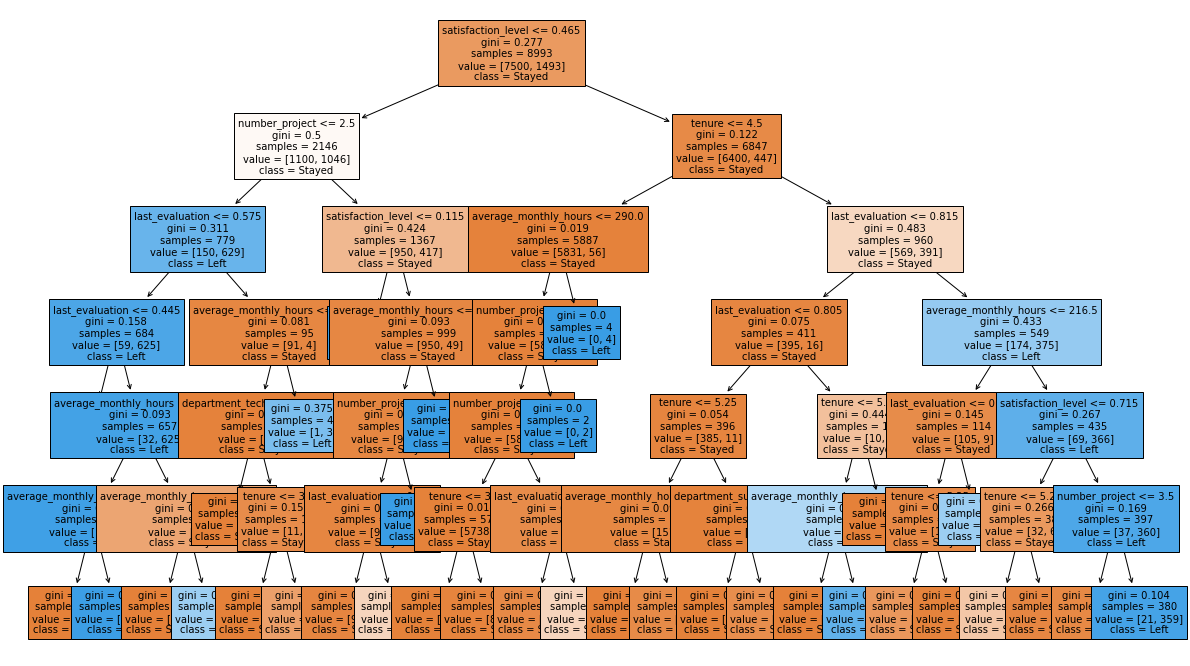

In [140]:
plt.figure(figsize=(20, 12))
plot_tree(tuned_dt.best_estimator_, filled=True, feature_names=X.columns, class_names=['Stayed', 'Left'], fontsize=10)
plt.show()


In [142]:

from sklearn.tree import export_text

tree_text = export_text(best_decision_tree, feature_names=X.columns.tolist())
print(tree_text)


|--- satisfaction_level <= 0.47
|   |--- number_project <= 2.50
|   |   |--- last_evaluation <= 0.57
|   |   |   |--- last_evaluation <= 0.44
|   |   |   |   |--- class: 0
|   |   |   |--- last_evaluation >  0.44
|   |   |   |   |--- average_monthly_hours <= 162.00
|   |   |   |   |   |--- average_monthly_hours <= 125.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- average_monthly_hours >  125.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- average_monthly_hours >  162.00
|   |   |   |   |   |--- average_monthly_hours <= 234.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- average_monthly_hours >  234.00
|   |   |   |   |   |   |--- class: 1
|   |   |--- last_evaluation >  0.57
|   |   |   |--- average_monthly_hours <= 279.00
|   |   |   |   |--- department_technical <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- department_technical >  0.50
|   |   |   |   |   |--- tenure <= 3.50
|   |   |   |   |   |   |--- class: 0
|  

In [30]:
# Define a function that extracts all the scores from the grid search
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [144]:
# Call the function
decision_tree_results = make_results('Tuned Decision Tree Model', tuned_dt, 'auc')
decision_tree_results

,model,precision,recall,F1,accuracy,auc
0,Tuned Decision Tree Model,0.969611,0.917618,0.942873,0.981541,0.976562


Text(0.5, 1.0, 'Feature importance')

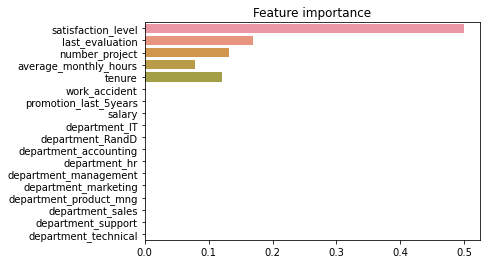

In [55]:
# Plot important features
feature_importance = tuned_dt.best_estimator_.feature_importances_

sns.barplot(x=feature_importance,
            y = X_train.columns,
           orient = 'h')

plt.savefig('Feature importance.png')
plt.title("Feature importance")

In [146]:
tuned_dt_pred = tuned_dt.predict(X_test)

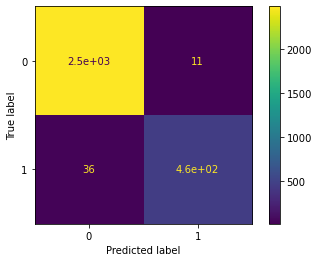

In [147]:
from sklearn.metrics import confusion_matrix as cm

# Calculate the confusion matrix
conf_matrix = cm(y_test, tuned_dt_pred, labels=decision_tree.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=decision_tree.classes_)
disp.plot()


Comparing with the results of firt Logistic Regression and Decision Tree (without tuning), according to these scores, the model provides a very good performance.

# Model 4: Random Forest

In [37]:
# instantiate a Random Forest Model
random_forest = RandomForestClassifier(random_state=0)

# Assign the hyper-parameters
cv_params = {'max_depth': [3,5, 10, None],
            'max_features':[1.0],
            'max_samples': [0.7, 1.0],
            'min_samples_leaf': [1,2,3],
            'min_samples_split': [2, 3, 4],
            'n_estimators': [50, 100, 200, 300, 500]}

# Define scores
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [38]:
# Instantiate another rf
random_forest = GridSearchCV(random_forest, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [150]:
# checking if Xs are okay or not
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3.0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,5.5,0,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4.0,0,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5.0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3.0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [39]:
%%time
# Fitting the random forest into train and test data
random_forest.fit(X_train, y_train)

CPU times: user 23min 20s, sys: 2.97 s, total: 23min 23s
Wall time: 23min 23s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [41]:
# Check best params
random_forest.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [42]:
# Get all evaluation scores
random_forest_results = make_results('random forest cv', random_forest, 'auc')
random_forest_results

,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.947205,0.911584,0.928984,0.976871,0.981835


In [24]:
# Define a function that gets all the scores from a model's predictions and evaluate the model on the test set.

def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    #auc = auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          #'AUC': [auc]
                         })
  
    return table

In [43]:
# Get predictions on test data
random_forest_test_scores = get_scores('random forest1 test', random_forest, X_test, y_test)
random_forest_test_scores

,model,precision,recall,f1,accuracy
0,random forest1 test,0.958506,0.927711,0.942857,0.981321


In [ ]:
# Apply model to predict on test data
y_pred = random_forest.predict(X_test)

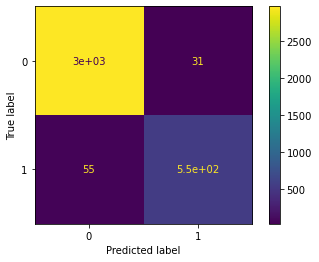

In [53]:
# Construct and display confusion matrix for the model
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf3.classes_)
disp.plot()

Text(0.5, 1.0, 'Feature importance')

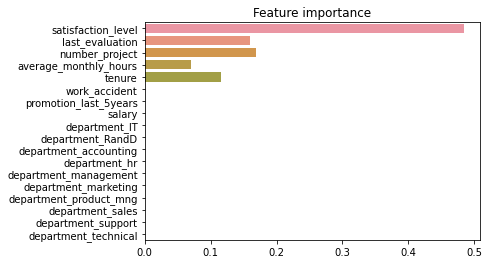

In [44]:
# Plot important features
feature_importance = random_forest.best_estimator_.feature_importances_

sns.barplot(x=feature_importance,
            y = X_train.columns,
           orient = 'h')
plt.title("Feature importance")

# Model 5: XGBoost

In [18]:
# Instantiate a xgb classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

In [19]:
# Define parameters for tuning
cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [20]:
# Construct the GridSearch

xgb_cv = GridSearchCV(xgb,
                     cv_params,
                     cv=5,
                     refit='f1')

In [21]:
%%time
# Fit the model
xgb_cv = xgb_cv.fit(X_train, y_train)

CPU times: user 3h 17min 43s, sys: 1min, total: 3h 18min 43s
Wall time: 1h 39min 24s


In [27]:
# Apply model to predict on test data
y_pred = xgb_cv.predict(X_test)

In [28]:
# get all evaluation scores
xgb_modl_scores = get_scores('XGBoosting Test Scores', xgb_cv, X_test, y_test)
xgb_modl_scores

,model,precision,recall,f1,accuracy
0,XGBoosting Test Scores,0.982759,0.915663,0.948025,0.983322


In [32]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.9562313253012047

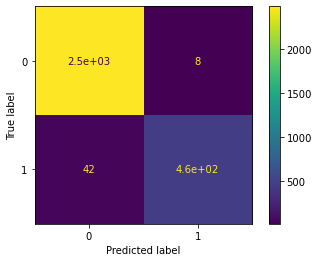

In [26]:
# Construct and display confusion matrix for the model
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb_cv.classes_)
disp.plot()

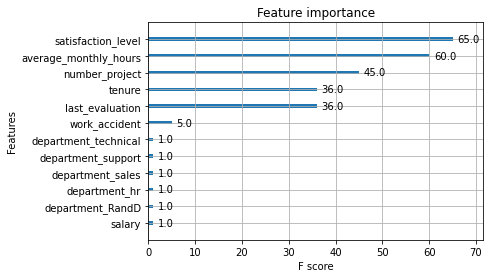

In [73]:
# Plot the most important features
plot_importance(xgb_cv.best_estimator_)

# Compare all the 5 models

In [34]:
# Create a table of results to compare model performance

table = pd.DataFrame({
    'Model': ['LogisticRegression', 'Decision Tree', 'Tuned DT', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.8232, 0.97, 0.9815, 0.9813, 0.97859],
    'Precision': [0.4331, 0.89, 0.9696, 0.9585,0.9663],
    'Recall': [0.1774, 0.9236, 0.9176, 0.9277, 0.9038],
    'F1': [0.2518, 0.9055, 0.9815, 0.9429,0.93401],
    'AUC': ['NA','NA', 0.9766, 0.9818, 0.9562]
})

print(table)

                Model  Accuracy  Precision  Recall       F1     AUC
0  LogisticRegression   0.82320     0.4331  0.1774  0.25180      NA
1       Decision Tree   0.97000     0.8900  0.9236  0.90550      NA
2            Tuned DT   0.98150     0.9696  0.9176  0.98150  0.9766
3       Random Forest   0.98130     0.9585  0.9277  0.94290  0.9818
4             XGBoost   0.97859     0.9663  0.9038  0.93401  0.9562


### Summary of model results

The best model was Tuned Decision Tree.
The features with most importance in the models were satisfaction_level, average_monthly_hours, number_project, tenure and last_evaluation.


### Recommendations to the Stakeholders

##### What business recommendations do you propose based on the models built?
The company should prioritize attention towards employees exhibiting low satisfaction levels, receiving lower evaluations, and working more than the average monthly hours. These indicators strongly suggest a higher likelihood of employee turnover, warranting proactive measures to address their concerns and improve retention.

##### What potential recommendations would you make to your manager/company?
- Set a limit for satisfaction level, and counsel with the employee when the value goes down.
- Reconsider to change the evaluation score based on number of works worked, instead assign higher scores of the employee who give more effort to the project.
- Set a lower & higher threshold of number of projects assigned to each employee.
- Explore promoting employees working for at least 4 years, or investigate why still they are not.
- Reward employees those who work longer hours or just notify them to avoid that.
- Initiate more cultural and open discussions both company-wide and team levels to improve the work culture.

##### Do you think your model could be improved Why or why not? How?
- As all variables were considered to all variables, random forest and xgboosting took much time to train the model. Feature engineering could be done after the decision tree results, choosing less X variables could save time.
- As the dataset was imbalanced, the logistic regression could not perform well. 
- Validation dataset could be defined along with training and testing data to cross-validate to ensure reliable performance.
- To enhance the random forest and XGBoost models, considering a broader range of hyperparameters for tuning can lead to better-performing models.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.